In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("book.csv")
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [4]:
from mlxtend.frequent_patterns import apriori, association_rules

In [5]:
frequent_itemset = apriori(df,min_support=0.005,use_colnames=True,max_len=2)
frequent_itemset 

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0375,"(ItalArt, ItalCook)"
62,0.0175,"(Florence, ItalCook)"
63,0.0165,"(ItalArt, ItalAtlas)"
64,0.0065,"(Florence, ItalAtlas)"


In [6]:
frequent_itemset.sort_values('support',ascending=False,inplace=True)
frequent_itemset.head()

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
12,0.256,"(ChildBks, CookBks)"


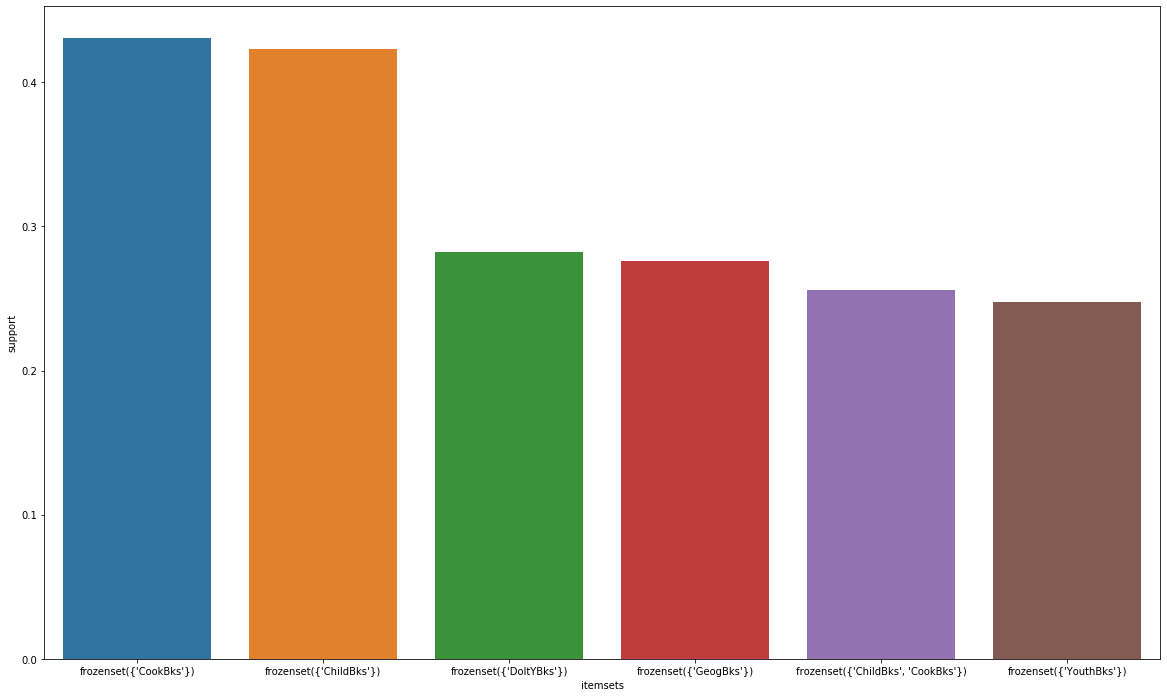

In [7]:
plt.figure(figsize=(20,12))
sns.barplot(x=frequent_itemset.itemsets[0:6],y=frequent_itemset.support[0:6],data=frequent_itemset)

In [8]:
rules = association_rules(frequent_itemset,metric='lift',min_threshold=0.8)

In [9]:
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
3,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
4,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
5,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
6,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
7,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
8,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
9,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347


In [10]:
rules.sort_values('lift', ascending=False, inplace=True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
105,(ItalAtlas),(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341
104,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
68,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
69,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
89,(ItalCook),(ItalAtlas),0.1135,0.0370,0.0230,0.202643,5.476842,0.018800,1.207740
88,(ItalAtlas),(ItalCook),0.0370,0.1135,0.0230,0.621622,5.476842,0.018800,2.342893
70,(RefBks),(ItalAtlas),0.2145,0.0370,0.0370,0.172494,4.662005,0.029063,1.163738
71,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
57,(ArtBks),(ItalArt),0.2410,0.0485,0.0485,0.201245,4.149378,0.036812,1.191229
56,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf


In [11]:
# Eliminating redundancy in rules

def remove_red(i):
    return (sorted(list(i)))

In [12]:
X = rules.antecedents.apply(remove_red) + rules.consequents.apply(remove_red)
X

105     [ItalAtlas, ItalArt]
104     [ItalArt, ItalAtlas]
68       [ItalArt, ItalCook]
69       [ItalCook, ItalArt]
89     [ItalCook, ItalAtlas]
               ...          
75      [Florence, DoItYBks]
60       [CookBks, Florence]
61       [Florence, CookBks]
87      [YouthBks, Florence]
86      [Florence, YouthBks]
Length: 110, dtype: object

In [13]:
X = X.sort_values()
X

15        [ArtBks, ChildBks]
11         [ArtBks, CookBks]
27        [ArtBks, DoItYBks]
55        [ArtBks, Florence]
25         [ArtBks, GeogBks]
               ...          
28       [YouthBks, GeogBks]
91       [YouthBks, ItalArt]
100    [YouthBks, ItalAtlas]
48      [YouthBks, ItalCook]
41        [YouthBks, RefBks]
Length: 110, dtype: object

In [15]:
X = X.apply(sorted)
X

15        [ArtBks, ChildBks]
11         [ArtBks, CookBks]
27        [ArtBks, DoItYBks]
55        [ArtBks, Florence]
25         [ArtBks, GeogBks]
               ...          
28       [GeogBks, YouthBks]
91       [ItalArt, YouthBks]
100    [ItalAtlas, YouthBks]
48      [ItalCook, YouthBks]
41        [RefBks, YouthBks]
Length: 110, dtype: object

In [16]:
rules_set = list(X)
rules_set

[['ArtBks', 'ChildBks'],
 ['ArtBks', 'CookBks'],
 ['ArtBks', 'DoItYBks'],
 ['ArtBks', 'Florence'],
 ['ArtBks', 'GeogBks'],
 ['ArtBks', 'ItalArt'],
 ['ArtBks', 'ItalAtlas'],
 ['ArtBks', 'ItalCook'],
 ['ArtBks', 'RefBks'],
 ['ArtBks', 'YouthBks'],
 ['ArtBks', 'ChildBks'],
 ['ChildBks', 'CookBks'],
 ['ChildBks', 'DoItYBks'],
 ['ChildBks', 'Florence'],
 ['ChildBks', 'GeogBks'],
 ['ChildBks', 'ItalArt'],
 ['ChildBks', 'ItalAtlas'],
 ['ChildBks', 'ItalCook'],
 ['ChildBks', 'RefBks'],
 ['ChildBks', 'YouthBks'],
 ['ArtBks', 'CookBks'],
 ['ChildBks', 'CookBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'Florence'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'ItalArt'],
 ['CookBks', 'ItalAtlas'],
 ['CookBks', 'ItalCook'],
 ['CookBks', 'RefBks'],
 ['CookBks', 'YouthBks'],
 ['ArtBks', 'DoItYBks'],
 ['ChildBks', 'DoItYBks'],
 ['CookBks', 'DoItYBks'],
 ['DoItYBks', 'Florence'],
 ['DoItYBks', 'GeogBks'],
 ['DoItYBks', 'ItalArt'],
 ['DoItYBks', 'ItalAtlas'],
 ['DoItYBks', 'ItalCook'],
 ['DoItYBks', 'RefBks']

In [17]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_set)]

index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_set.index(i))

In [18]:
# Getting rules without any redundancy

rules_without_redundancy = rules.iloc[index_rules]
rules_without_redundancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
96,(DoItYBks),(ItalAtlas),0.2820,0.0370,0.0190,0.067376,1.820970,0.008566,1.032570
83,(ItalAtlas),(ChildBks),0.0370,0.4230,0.0285,0.770270,1.820970,0.012849,2.511647
23,(GeogBks),(DoItYBks),0.2760,0.2820,0.1325,0.480072,1.702385,0.054668,1.380962
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
28,(YouthBks),(GeogBks),0.2475,0.2760,0.1205,0.486869,1.764017,0.052190,1.410945
29,(GeogBks),(YouthBks),0.2760,0.2475,0.1205,0.436594,1.764017,0.052190,1.335627
67,(ItalArt),(CookBks),0.0485,0.4310,0.0410,0.845361,1.961394,0.020096,3.679533
88,(ItalAtlas),(ItalCook),0.0370,0.1135,0.0230,0.621622,5.476842,0.018800,2.342893
78,(DoItYBks),(ItalArt),0.2820,0.0485,0.0300,0.106383,2.193463,0.016323,1.064774
104,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547


In [20]:
rules_without_redundancy.sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
105,(ItalAtlas),(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341
104,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
69,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
68,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
88,(ItalAtlas),(ItalCook),0.0370,0.1135,0.0230,0.621622,5.476842,0.018800,2.342893
